# Task2 - EDA




**赛题：零基础入门数据挖掘 - 二手车交易价格预测**

地址：https://tianchi.aliyun.com/competition/entrance/231784/introduction?spm=5176.12281957.1004.1.38b02448ausjSX

In [1]:
# 查看数据文件目录  list datalab files
import os
print(os.getcwd())#获得当前工作目录

C:\Users\never\Desktop\Data competition\3. used car


### Step 1:导入函数工具箱

In [2]:
## 基础工具
import numpy as np
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('classic')
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
import time
import missingno as msno

warnings.filterwarnings('ignore')
%matplotlib inline

## 模型预测的
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

## 数据降维处理的
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA

import lightgbm as lgb
import xgboost as xgb

## 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 加上这两行可以一次性输出多个变量而不用print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Step 2:数据读取

In [31]:
path = './data/'
## 通过Pandas对于数据进行读取 (pandas是一个很友好的数据读取函数库)
Train_data = pd.read_csv(path + 'used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv(path + 'used_car_testA_20200313.csv', sep=' ')

## 输出数据的大小信息
print('Train data shape:',Train_data.shape)
print('Test data shape:',Test_data.shape)

Train data shape: (150000, 31)
TestA data shape: (50000, 30)


#### 1) 数据简要浏览

In [4]:
#如果想显示全部列，可以添加下面的设置，表示最大显示的列数为100
pd.set_option('display.max_columns', 100)

## 通过.head() 简要浏览读取数据的形式
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


#### 2) 数据信息查看

In [5]:
## 通过 .info() 简要可以看到对应一些数据列名，以及NAN缺失信息
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [6]:
## 通过 .columns 查看列名
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [33]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
SaleID               50000 non-null int64
name                 50000 non-null int64
regDate              50000 non-null int64
model                50000 non-null float64
brand                50000 non-null int64
bodyType             48587 non-null float64
fuelType             47107 non-null float64
gearbox              48090 non-null float64
power                50000 non-null int64
kilometer            50000 non-null float64
notRepairedDamage    50000 non-null object
regionCode           50000 non-null int64
seller               50000 non-null int64
offerType            50000 non-null int64
creatDate            50000 non-null int64
v_0                  50000 non-null float64
v_1                  50000 non-null float64
v_2                  50000 non-null float64
v_3                  50000 non-null float64
v_4                  50000 non-null float64
v_5                  50000 non

#### 3) 数据统计信息浏览

In [8]:
## 通过 .describe() 可以查看数值特征列的一些统计信息
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [9]:
Test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,174999.500000,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,2590.604820,0.0,0.0,2.016033e+07,44.418233,-0.037238,0.050534,0.084640,0.015001,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,14433.901067,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,1876.970263,0.0,0.0,7.951521e+01,2.429950,3.642562,2.856341,2.026510,1.193026,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,150000.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,2.015061e+07,28.987024,-4.137733,-4.205728,-5.638184,-4.287718,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,162499.750000,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1030.000000,0.0,0.0,2.016031e+07,43.139621,-3.191909,-0.971266,-1.453453,-0.928089,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,174999.500000,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,2219.000000,0.0,0.0,2.016032e+07,44.611084,-3.050756,-0.388117,0.097881,-0.070225,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,187499.250000,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3857.000000,0.0,0.0,2.016033e+07,45.992639,3.997323,0.240548,1.562700,0.863731,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,199999.000000,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,8121.000000,0.0,0.0,2.016041e+07,51.751684,7.553517,18.394570,9.381599,5.270150,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


### Step 3:数据检测

#### 1) 缺失值检测
方法一 .info()函数  
方法二 .isnull().sum()函数  
方法三 方法二的可视化  
方法四 missingno包的可视化效果  
  
**注意点:**  
以上方法都是只能识别数据为空的情况；  
实际应用中会存在，显示NaN，blank，- 等情况，需要实际观察

In [10]:
# 方法一 .info()函数
print('训练集缺失值情况：')
Train_data.info()
print('测试集缺失值情况：')
Test_data.info()

训练集缺失值情况：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64


In [34]:
# 方法二 .isnull().sum()函数  
print('训练集缺失值情况：\n',Train_data.isnull().sum())
print('训练集缺失值情况：\n',Test_data.isnull().sum())

训练集缺失值情况：
 SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64
训练集缺失值情况：
 SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fue

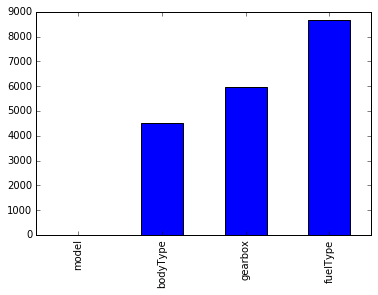

In [12]:
# 方法三 方法二的可视化  
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

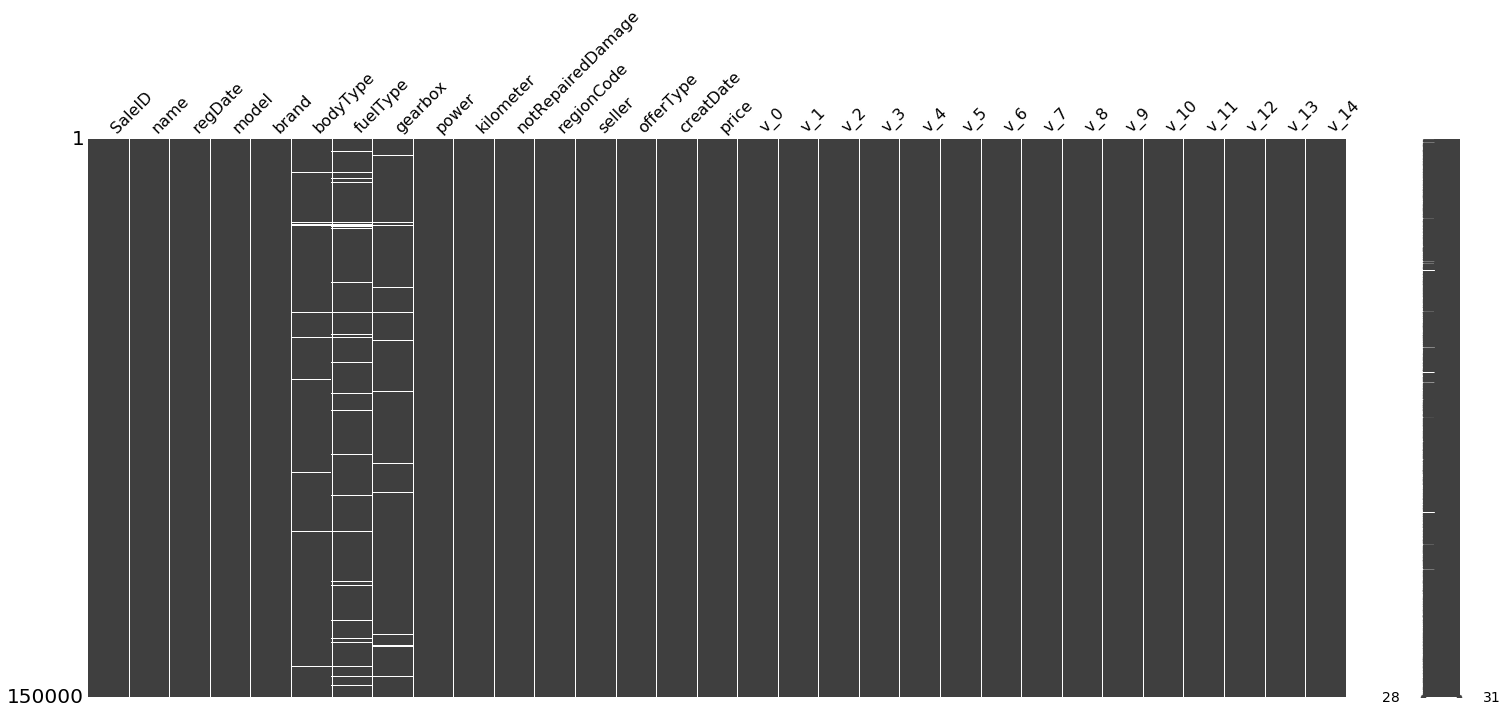

In [13]:
# 方法四 missingno包的可视化效果
msno.matrix(Train_data)

#### 2) 异常值检测
异常值的检测通常是需要结合数据分布一起考量的；这里只是简单说下理论，   

**常见方法**有：  
a. 均方差,正态分布的±3σ标准差，大约 99.7% 会在三个标准差范围  
b. 箱形图和散点图，通过可视化方法来直观的看出离群点  
c. 算法方法，聚类，孤立森林  
  
**注意点** 
以上说的都只适用于连续型特征；  
离散型特征更趋向于人的主观判断，比如某些类别过少等；  
离散型特征，主要处理的目标变量的不平衡问题；  
异常值并不存在完美严格的标准可以适用于一切情况，最关键的还是需要结合实际情况分析。

### Step 4:数据分布

#### 1) 提取数值/类型特征列名
先根据info()函数初步判断哪些特征是数值型和object型的；  
然后根据实际含义分析是否是分类变量

In [48]:
# 可以看出给的数据全都是数值型的，就需要人根据字段含义主观判断了
numerical_cols = Train_data.select_dtypes(exclude = 'object').columns
print(numerical_cols)
categorical_cols = Train_data.select_dtypes(include = 'object').columns
print(categorical_cols)

# 人为定一下
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'regionCode', 'seller', 'offerType',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')
Index(['notRepairedDamage'], dtype='object')


#### 2) 单一特征的分布
**连续型：**  
一般用箱线图和直方图来可视化分布情况；
然后计算一下常规统计量，最大/最小值，均值，平方差等，正如describe()函数

**离散型：**  
直接value_count()可以很清晰看出每个类别有多少值；  
直方图可视化

In [15]:
# 连续型
# 定义了一个统计函数，方便后续信息统计
def Sta_inf(data):
    print('_min',np.min(data))
    print('_max:',np.max(data))
    print('_mean',np.mean(data))
    print('_ptp',np.ptp(data))
    print('_std',np.std(data))
    print('_var',np.var(data))

In [29]:
# train 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

bodyType的特征分布如下：
bodyType特征有个8不同的值
0.0    41420
1.0    35272
2.0    30324
3.0    13491
4.0     9609
5.0     7607
6.0     6482
7.0     1289
Name: bodyType, dtype: int64
fuelType的特征分布如下：
fuelType特征有个7不同的值
0.0    91656
1.0    46991
2.0     2212
3.0      262
4.0      118
5.0       45
6.0       36
Name: fuelType, dtype: int64
gearbox的特征分布如下：
gearbox特征有个2不同的值
0.0    111623
1.0     32396
Name: gearbox, dtype: int64
notRepairedDamage的特征分布如下：
notRepairedDamage特征有个3不同的值
0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64


In [32]:
# test 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Test_data[cat_fea].nunique()))
    print(Test_data[cat_fea].value_counts())

bodyType的特征分布如下：
bodyType特征有个8不同的值
0.0    13985
1.0    11882
2.0     9900
3.0     4433
4.0     3303
5.0     2537
6.0     2116
7.0      431
Name: bodyType, dtype: int64
fuelType的特征分布如下：
fuelType特征有个7不同的值
0.0    30656
1.0    15544
2.0      774
3.0       72
4.0       37
6.0       14
5.0       10
Name: fuelType, dtype: int64
gearbox的特征分布如下：
gearbox特征有个2不同的值
0.0    37301
1.0    10789
Name: gearbox, dtype: int64
notRepairedDamage的特征分布如下：
notRepairedDamage特征有个3不同的值
0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64


(array([1.23906e+05, 1.89270e+04, 4.91800e+03, 1.34000e+03, 4.71000e+02,
        1.88000e+02, 1.24000e+02, 6.00000e+01, 4.80000e+01, 1.80000e+01]),
 array([1.10000e+01, 1.00098e+04, 2.00086e+04, 3.00074e+04, 4.00062e+04,
        5.00050e+04, 6.00038e+04, 7.00026e+04, 8.00014e+04, 9.00002e+04,
        9.99990e+04]),
 <a list of 10 Patch objects>)

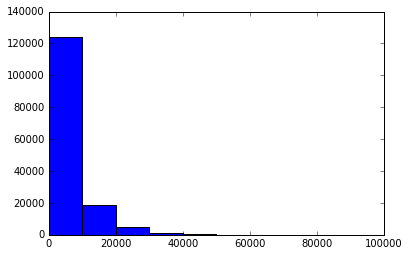

In [16]:
# 绘制标签的统计图，查看标签分布
plt.hist(Train_data['price'])
plt.show()
plt.close()

In [17]:
Sta_inf(Train_data['price'])

_min 11
_max: 99999
_mean 5923.327333333334
_ptp 99988
_std 7501.973469876438
_var 56279605.94272992


In [18]:
Train_data.describe()
# 特别针对匿名变量V系列，可以看到均值基本都是0，标准差也不大，可以看出这些匿名变量很可能是已经经过标准化处理了。

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [19]:
# 离散型
Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

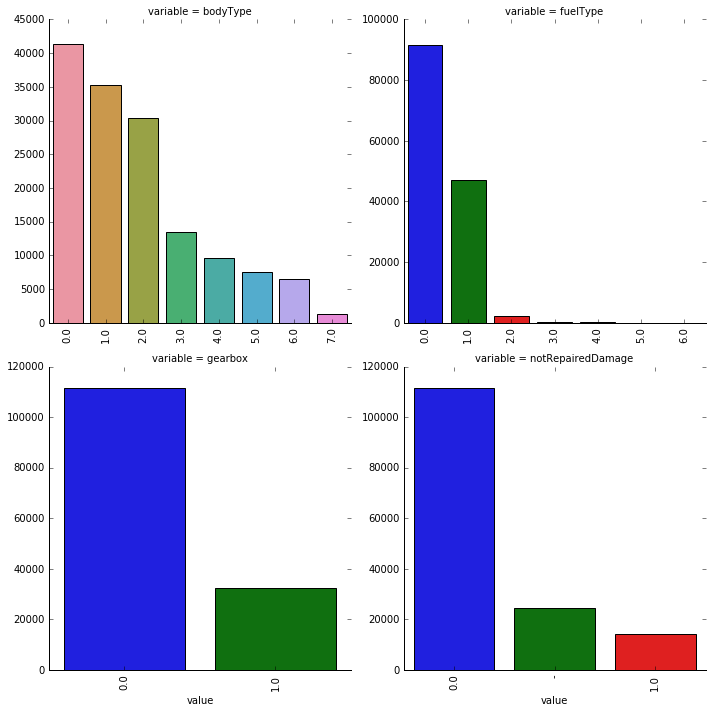

In [20]:
categorical_features = [ 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g.map(count_plot, "value")

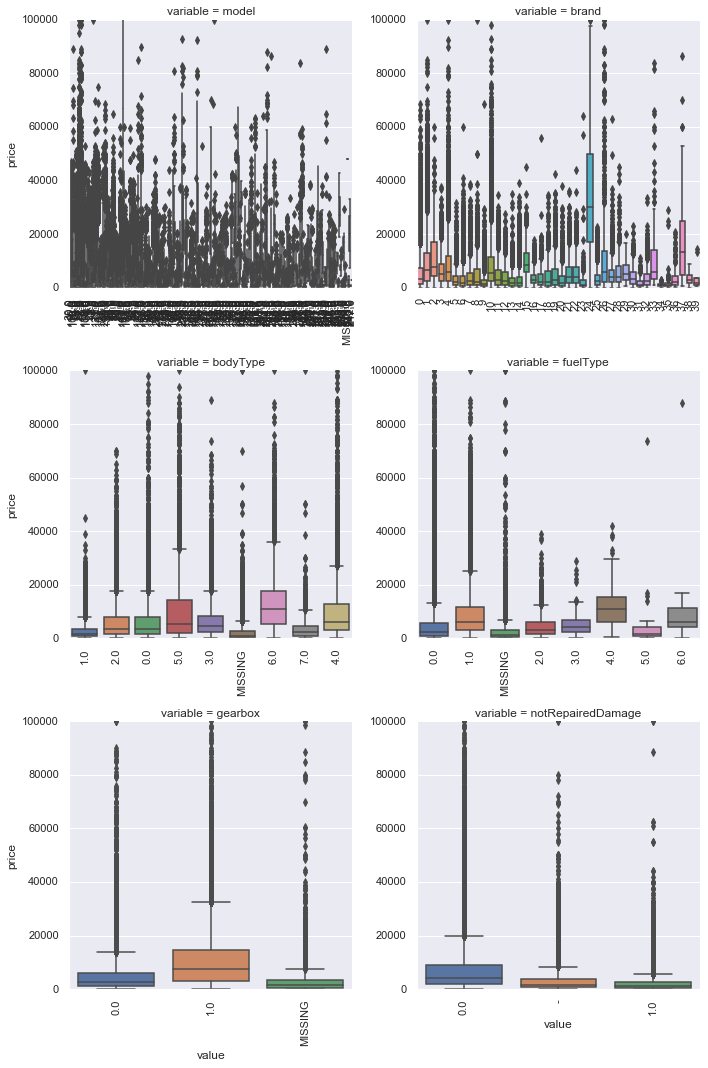

In [62]:
#类别特征箱形图可视化

# 因为 name和 regionCode的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage']
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

#### 3) 自变量和因变量的交互分布
主要探索变量之间的相关性。  
热力图可视化图是个很好的工具

In [50]:
numeric_features.append('price')
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [56]:
# 1) 相关性分析
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
correlation

,power,kilometer,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,price
power,1.000000,-0.019631,0.215028,0.023746,-0.031487,-0.185342,-0.141013,0.119727,0.025648,-0.060397,0.155956,-0.140203,-0.092717,-0.122107,0.161990,-0.103430,-0.023808,0.219834
kilometer,-0.019631,1.000000,-0.225034,-0.022228,-0.110375,0.402502,-0.214861,0.049502,-0.024664,-0.017835,-0.407686,-0.149422,0.083358,0.066542,-0.370153,-0.285158,-0.120389,-0.440519
v_0,0.215028,-0.225034,1.000000,0.245049,-0.452591,-0.710480,-0.259714,0.726250,0.243783,-0.584363,0.514149,-0.186243,-0.582943,-0.667809,0.415711,-0.136938,-0.039809,0.628397
v_1,0.023746,-0.022228,0.245049,1.000000,-0.001133,-0.001915,-0.000468,0.109303,0.999415,-0.110806,-0.298966,-0.007698,-0.921904,0.370445,-0.087593,0.017349,0.002143,0.060914
v_2,-0.031487,-0.110375,-0.452591,-0.001133,1.000000,0.001224,-0.001021,-0.921857,0.023877,0.973689,0.180285,-0.236164,0.274341,0.800915,0.535270,-0.055376,-0.013785,0.085322
v_3,-0.185342,0.402502,-0.710480,-0.001915,0.001224,1.000000,-0.001694,-0.233412,-0.000747,0.191278,-0.933161,0.079292,0.247385,0.429777,-0.811301,-0.246052,-0.058561,-0.730946
v_4,-0.141013,-0.214861,-0.259714,-0.000468,-0.001021,-0.001694,1.000000,-0.259739,-0.011275,-0.054241,0.051741,0.962928,0.071116,0.110660,-0.134611,0.934580,-0.178518,-0.147085
v_5,0.119727,0.049502,0.726250,0.109303,-0.921857,-0.233412,-0.259739,1.000000,0.091229,-0.939385,0.010686,-0.050343,-0.440588,-0.845954,-0.258521,-0.162689,0.037804,0.164317
v_6,0.025648,-0.024664,0.243783,0.999415,0.023877,-0.000747,-0.011275,0.091229,1.000000,-0.085410,-0.294956,-0.023057,-0.917056,0.386446,-0.070238,0.000758,-0.003322,0.068970
v_7,-0.060397,-0.017835,-0.584363,-0.110806,0.973689,0.191278,-0.054241,-0.939385,-0.085410,1.000000,0.028695,-0.264091,0.410014,0.813175,0.385378,-0.154535,-0.020218,-0.053024


Text(0.5, 1, 'Correlation of Numeric Features with Price')

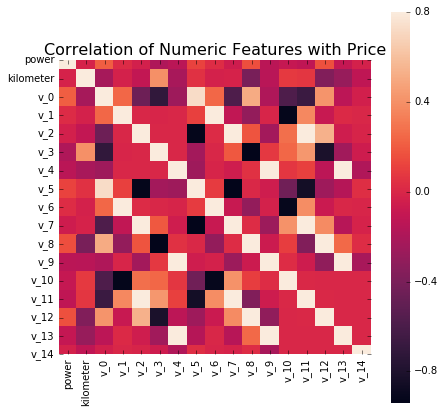

In [21]:
# 相关系数热力图
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()

f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

通过看图，颜色太深或者太淡的都代表相关性高。  
如果要使用多元线性回归模型，就需要考虑多重共线性的问题。  
如果是采用树模型就不需要

In [57]:
##  查看几个特征得 偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(Train_data[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(Train_data[col].kurt())  
         )
# power明显异常

power           Skewness: 65.86     Kurtosis: 5733.45
kilometer       Skewness: -1.53     Kurtosis: 001.14
v_0             Skewness: -1.32     Kurtosis: 003.99
v_1             Skewness: 00.36     Kurtosis: -01.75
v_2             Skewness: 04.84     Kurtosis: 023.86
v_3             Skewness: 00.11     Kurtosis: -00.42
v_4             Skewness: 00.37     Kurtosis: -00.20
v_5             Skewness: -4.74     Kurtosis: 022.93
v_6             Skewness: 00.37     Kurtosis: -01.74
v_7             Skewness: 05.13     Kurtosis: 025.85
v_8             Skewness: 00.20     Kurtosis: -00.64
v_9             Skewness: 00.42     Kurtosis: -00.32
v_10            Skewness: 00.03     Kurtosis: -00.58
v_11            Skewness: 03.03     Kurtosis: 012.57
v_12            Skewness: 00.37     Kurtosis: 000.27
v_13            Skewness: 00.27     Kurtosis: -00.44
v_14            Skewness: -1.19     Kurtosis: 002.39
price           Skewness: 03.35     Kurtosis: 019.00


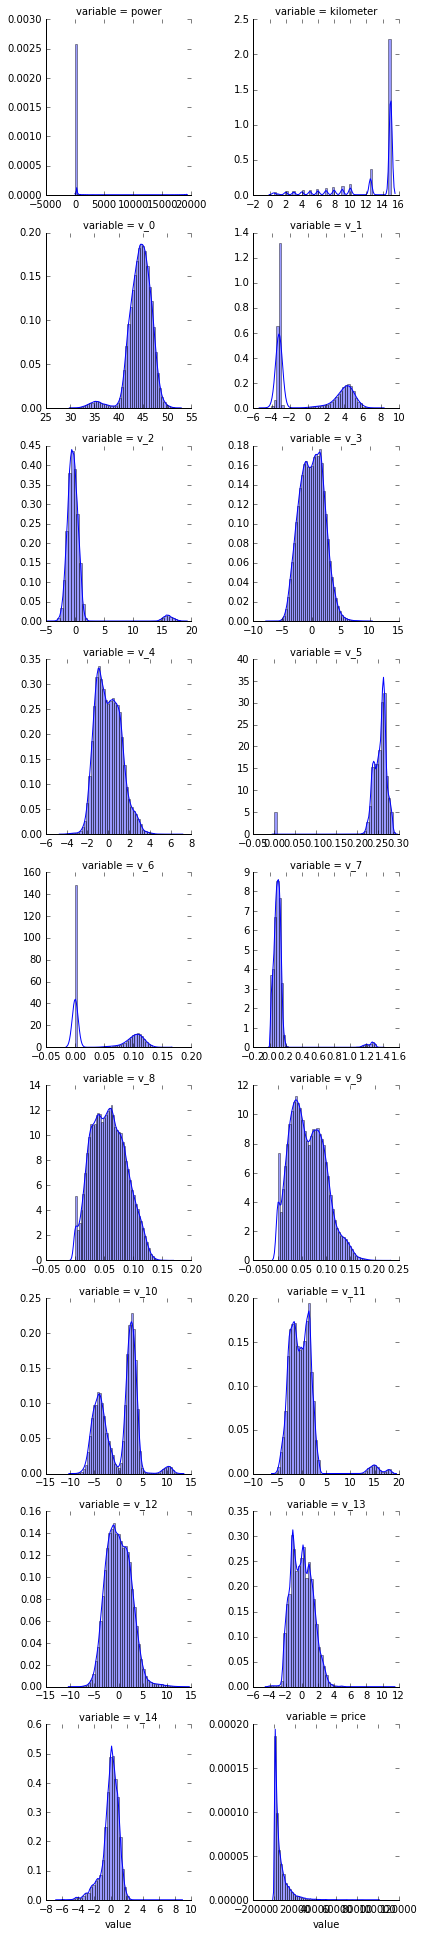

In [58]:
#  每个数字特征得分布可视化
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

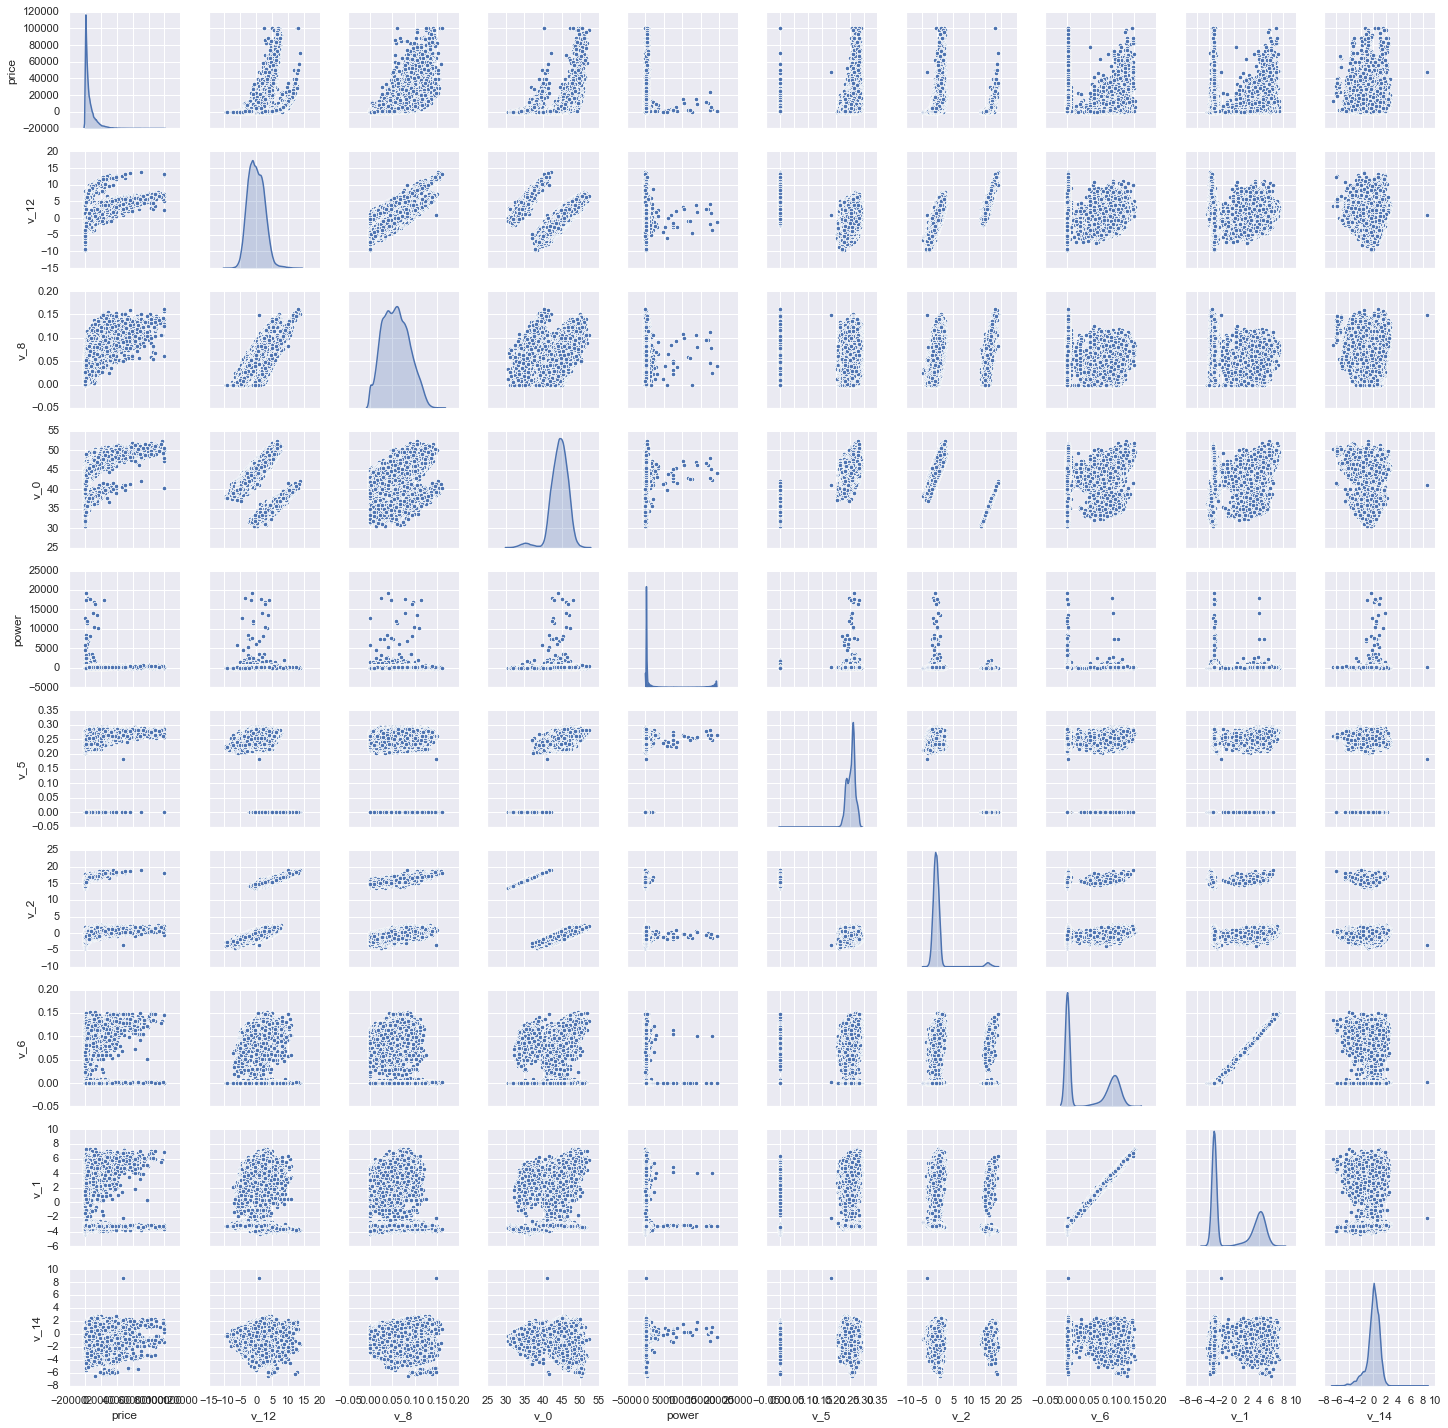

In [59]:
##  数字特征相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

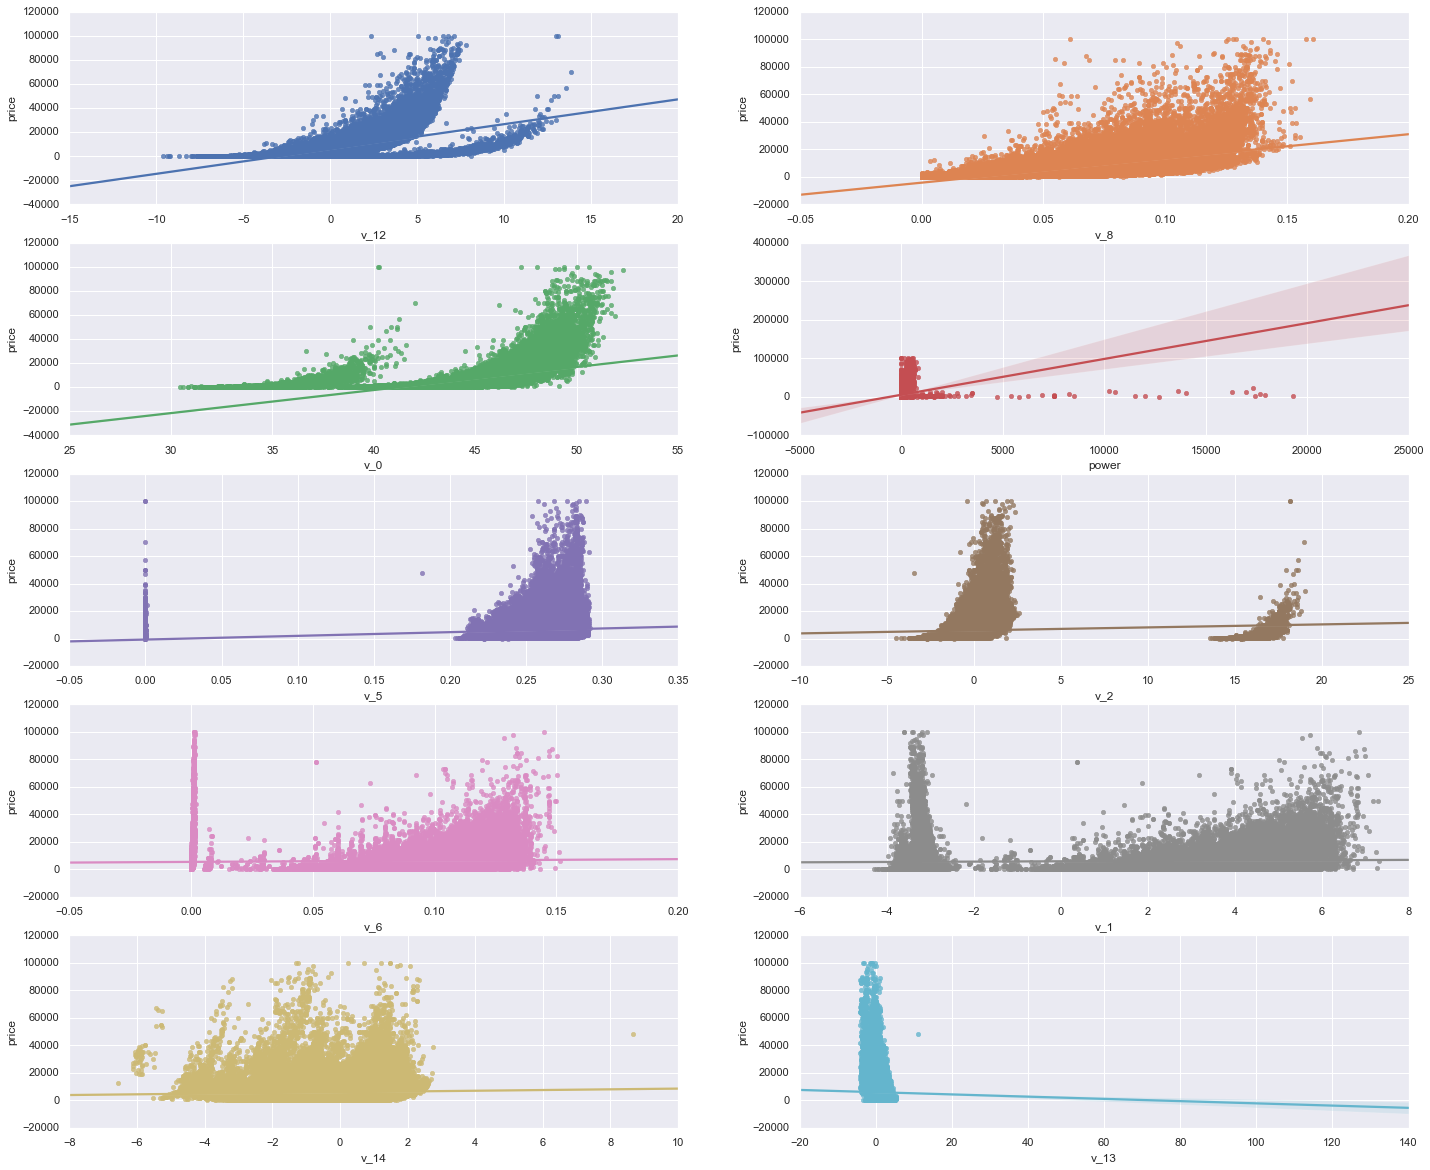

In [61]:
## 5) 多变量互相回归关系可视化
Y_train = Train_data['price']
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)


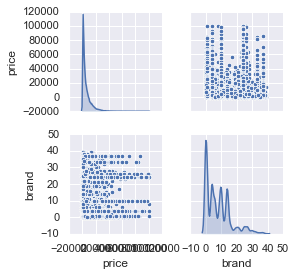

In [79]:
# 类别变量和price的分布关系
#缺失值用999替换

#Train_data['bodyType'] = Train_data['bodyType'].cat.add_categories(['999']);
Train_data['bodyType'].fillna('999', inplace=True);
#Train_data['gearbox'] = Train_data['gearbox'].cat.add_categories(['999']);
Train_data['gearbox'].fillna('999', inplace=True);
#Train_data['fuelType'] = Train_data['fuelType'].cat.add_categories(['999']);
Train_data['fuelType'].fillna('999', inplace=True);
#Train_data['b'] = Train_data['b'].cat.add_categories(['999']);
#Train_data['b'].fillna('999', inplace=True);

sns.set()
columns = ['price','model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

遇到的问题:  
一开始运行以下code   
  
```
sns.set()  
columns = ['price','model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']  
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')  
plt.show()  
```
  
只出现brand和price的图，因为其他变量有缺失值导致的  

In [70]:
columns = ['price','model', 'brand', 'bodyType', 'fuelType', 'gearbox']


0         1
1         2
2         1
3         0
4         1
         ..
149995    4
149996    0
149997    1
149998    3
149999    6
Name: bodyType, Length: 150000, dtype: category
Categories (9, object): [0, 1, 2, 3, ..., 5, 6, 7, MISSING]

In [ ]:
# 用pandas_profiling生成数据报告
import pandas_profiling
pfr = pandas_profiling.ProfileReport(Train_data)
pfr.to_file("./example.html")

#### 4) 目标变量的分布
**回归**   
一般来说，对于回归问题，因变量y需要服从正太分布，如果偏态太多，可以进行取对数log等操作。  
  
**分类**    
以前准备的参考资料  
[数据不平衡问题](https://shimo.im/docs/dtWwk9GXDXvkqxTq/)

In [22]:
Train_data['price']

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Johnson SU')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Normal')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Log Normal')

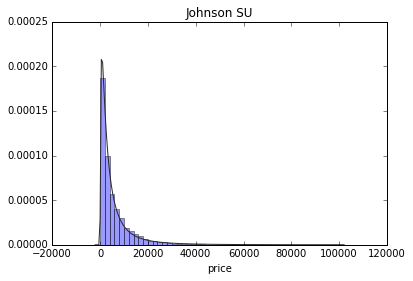

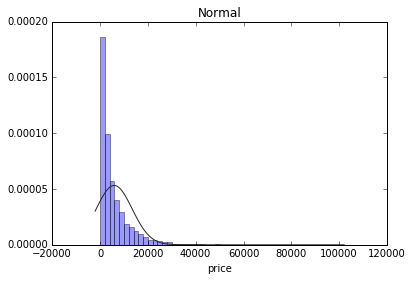

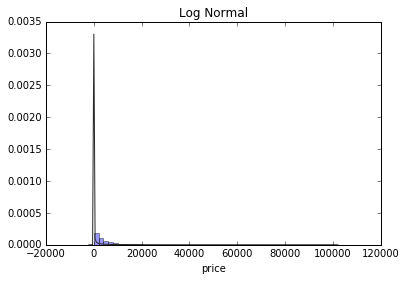

In [23]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

价格不服从正态分布，所以在进行回归之前，它必须进行转换。虽然对数变换做得很好，但最佳拟合是无界约翰逊分布  
之后还可以尝试一种思路：  
将目标变量中的极大极小值去除掉查看分布。

In [24]:
Train_data.skew(), Train_data.kurt()

(SaleID          0.000000
 name            0.557606
 regDate         0.028495
 model           1.484388
 brand           1.150760
 bodyType        0.991530
 fuelType        1.595486
 gearbox         1.317514
 power          65.863178
 kilometer      -1.525921
 regionCode      0.688881
 seller        387.298335
 offerType       0.000000
 creatDate     -79.013310
 price           3.346487
 v_0            -1.316712
 v_1             0.359454
 v_2             4.842556
 v_3             0.106292
 v_4             0.367989
 v_5            -4.737094
 v_6             0.368073
 v_7             5.130233
 v_8             0.204613
 v_9             0.419501
 v_10            0.025220
 v_11            3.029146
 v_12            0.365358
 v_13            0.267915
 v_14           -1.186355
 dtype: float64, SaleID            -1.200000
 name              -1.039945
 regDate           -0.697308
 model              1.740483
 brand              1.076201
 bodyType           0.206937
 fuelType           5.880049
 

很明显可以看出，seller，power，creatDate这三个变量异常。

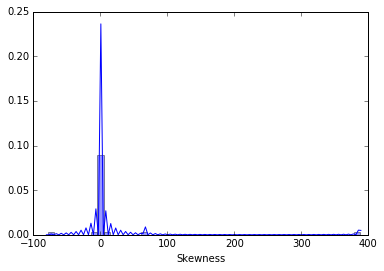

In [25]:
sns.distplot(Train_data.skew(),color='blue',axlabel ='Skewness')

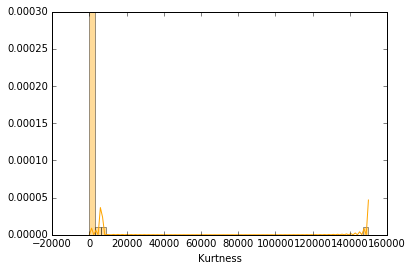

In [26]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')

(array([1.23906e+05, 1.89270e+04, 4.91800e+03, 1.34000e+03, 4.71000e+02,
        1.88000e+02, 1.24000e+02, 6.00000e+01, 4.80000e+01, 1.80000e+01]),
 array([1.10000e+01, 1.00098e+04, 2.00086e+04, 3.00074e+04, 4.00062e+04,
        5.00050e+04, 6.00038e+04, 7.00026e+04, 8.00014e+04, 9.00002e+04,
        9.99990e+04]),
 <a list of 10 Patch objects>)

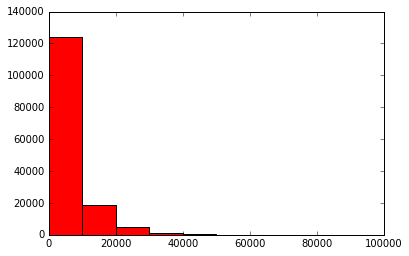

In [27]:
# 3) 查看预测值的具体频数
plt.hist(Train_data['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

查看频数, 大于20000得值极少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，再前面进行

(array([   56.,   223.,  1508.,  6232., 22319., 35387., 39059., 33184.,
        11123.,   909.]),
 array([ 2.39789527,  3.30939729,  4.22089931,  5.13240133,  6.04390335,
         6.95540537,  7.86690739,  8.77840941,  9.68991143, 10.60141345,
        11.51291546]),
 <a list of 10 Patch objects>)

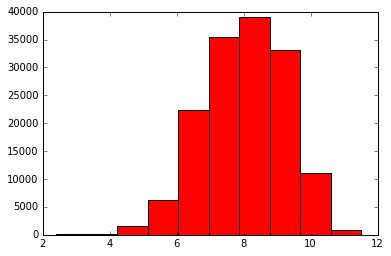

In [28]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()